In [4]:
from os import listdir
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#plotly
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

import seaborn as sns
sns.set(style="whitegrid")


#pydicom
import pydicom

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')


# Settings for pretty nice plots
plt.style.use('fivethirtyeight')
plt.show()

In [7]:
import os
DataPath = "E:\ISIC"
print(os.listdir(DataPath))

['ISIC_2020_Training_GroundTruth.csv', 'jpeg.zip', 'test', 'test.csv', 'tfrecords', 'tfrecords.zip', 'train', 'train.csv', 'train.csv.zip']


In [9]:
train_df = pd.read_csv(os.path.join(DataPath , 'train.csv'))
# test_df = pd.read_csv('test.csv')

#Training data
print('Training data shape: ', train_df.shape)
train_df.head(5)

Training data shape:  (33126, 8)


,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [10]:
train_df.groupby(['benign_malignant']).count()['sex'].to_frame()

,sex
benign_malignant,
benign,32477
malignant,584


In [11]:
# Null values and Data types
print('Train Set')
print(train_df.info())
print('-------------')

Train Set
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 8 columns):
image_name                       33126 non-null object
patient_id                       33126 non-null object
sex                              33061 non-null object
age_approx                       33058 non-null float64
anatom_site_general_challenge    32599 non-null object
diagnosis                        33126 non-null object
benign_malignant                 33126 non-null object
target                           33126 non-null int64
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ MB
None
-------------


In [12]:
# Total number of images in the dataset(train+test)
print("Total images in Train set: ",train_df['image_name'].count())

Total images in Train set:  33126


In [13]:
print(f"The total patient ids are {train_df['patient_id'].count()}, from those the unique ids are {train_df['patient_id'].value_counts().shape[0]} ")

The total patient ids are 33126, from those the unique ids are 2056 


In [14]:
columns = train_df.keys()
columns = list(columns)
print(columns)

['image_name', 'patient_id', 'sex', 'age_approx', 'anatom_site_general_challenge', 'diagnosis', 'benign_malignant', 'target']


In [15]:
print(train_df['target'].value_counts())

0    32542
1      584
Name: target, dtype: int64


In [16]:
train_df['target'].value_counts(normalize=True).iplot(kind='bar',
                                                      yTitle='Percentage', 
                                                      linecolor='black', 
                                                      opacity=0.7,
                                                      color='red',
                                                      theme='pearl',
                                                      bargap=0.8,
                                                      gridcolor='white',
                                                     
                                                      title='Distribution of the Target column in the training set')

In [18]:
train_df['sex'].value_counts(normalize=True)
train_df['sex'].value_counts(normalize=True).iplot(kind='bar',
                                                      yTitle='Percentage', 
                                                      linecolor='black', 
                                                      opacity=0.7,
                                                      color='green',
                                                      theme='pearl',
                                                      bargap=0.8,
                                                      gridcolor='white',
                                                     
                                                      title='Distribution of the Sex column in the training set')

In [19]:
z=train_df.groupby(['target','sex'])['benign_malignant'].count().to_frame().reset_index()
z.style.background_gradient(cmap='Reds') 

,target,sex,benign_malignant
0,0,female,15761
1,0,male,16716
2,1,female,220
3,1,male,364


Text(0.5, 30.198124999999997, 'benign:0 vs malignant:1')

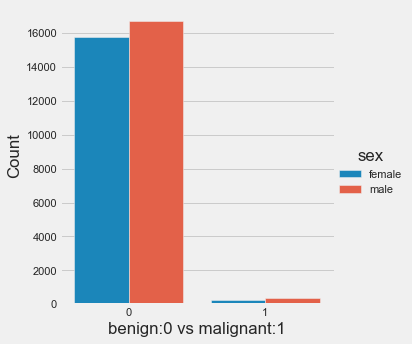

In [20]:
sns.catplot(x='target',y='benign_malignant', hue='sex',data=z,kind='bar')
plt.ylabel('Count')
plt.xlabel('benign:0 vs malignant:1')

In [21]:
train_df['anatom_site_general_challenge'].value_counts(normalize=True).sort_values()

oral/genital       0.003804
palms/soles        0.011503
head/neck          0.056904
upper extremity    0.152857
lower extremity    0.258198
torso              0.516734
Name: anatom_site_general_challenge, dtype: float64

In [22]:
train_df['anatom_site_general_challenge'].value_counts(normalize=True).sort_values().iplot(kind='barh',
                                                      xTitle='Percentage', 
                                                      linecolor='black', 
                                                      opacity=0.7,
                                                      color='#FB8072',
                                                      theme='pearl',
                                                      bargap=0.2,
                                                      gridcolor='white',
                                                      title='Distribution of the imaged site in the training set')

Text(43.054131423611125, 0.5, 'count of melanoma cases')

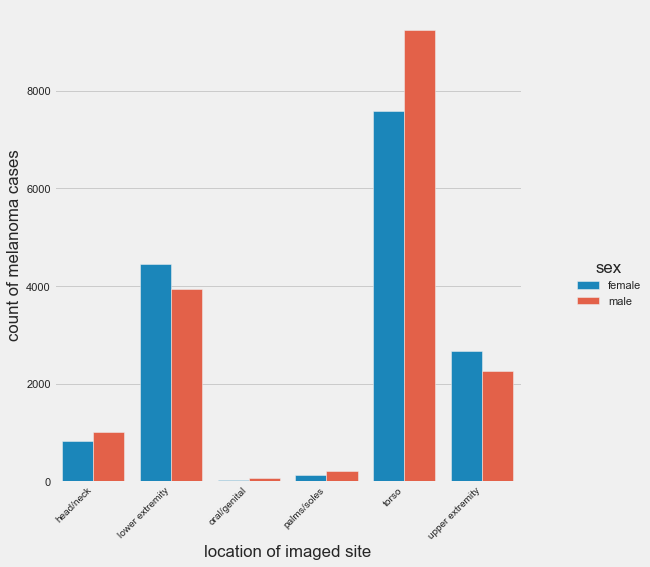

In [23]:
z1=train_df.groupby(['sex','anatom_site_general_challenge'])['benign_malignant'].count().to_frame().reset_index()
z1.style.background_gradient(cmap='Reds')
sns.catplot(x='anatom_site_general_challenge',y='benign_malignant', hue='sex',data=z1,kind='bar')
plt.gcf().set_size_inches(10,8)
plt.xlabel('location of imaged site')
plt.xticks(rotation=45,fontsize='10', horizontalalignment='right')
plt.ylabel('count of melanoma cases')

In [24]:
train_df['age_approx'].iplot(kind='hist',bins=30,color='orange',xTitle='Age distribution',yTitle='Count')

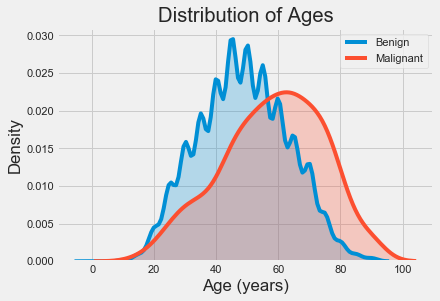

In [25]:
# KDE plot of age that were diagnosed as benign
sns.kdeplot(train_df.loc[train_df['target'] == 0, 'age_approx'], label = 'Benign',shade=True)

# KDE plot of age that were diagnosed as malignant
sns.kdeplot(train_df.loc[train_df['target'] == 1, 'age_approx'], label = 'Malignant',shade=True)

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

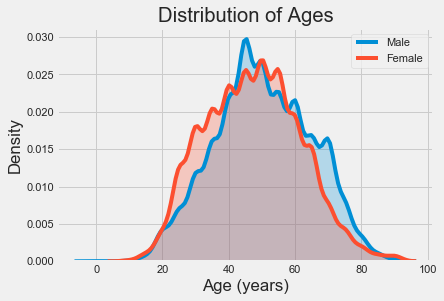

In [26]:
# KDE plot of age that were diagnosed as benign
sns.kdeplot(train_df.loc[train_df['sex'] == 'male', 'age_approx'], label = 'Male',shade=True)

# KDE plot of age that were diagnosed as malignant
sns.kdeplot(train_df.loc[train_df['sex'] == 'female', 'age_approx'], label = 'Female',shade=True)

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

In [27]:
train_df['diagnosis'].value_counts()

unknown                               27124
nevus                                  5193
melanoma                                584
seborrheic keratosis                    135
lentigo NOS                              44
lichenoid keratosis                      37
solar lentigo                             7
atypical melanocytic proliferation        1
cafe-au-lait macule                       1
Name: diagnosis, dtype: int64

In [28]:
train_df['diagnosis'].value_counts(normalize=True).sort_values().iplot(kind='barh',
                                                      xTitle='Percentage', 
                                                      linecolor='black', 
                                                      opacity=0.7,
                                                      color='blue',
                                                      theme='pearl',
                                                      bargap=0.2,
                                                      gridcolor='white',
                                                      title='Distribution in the training set')

Display Random Images


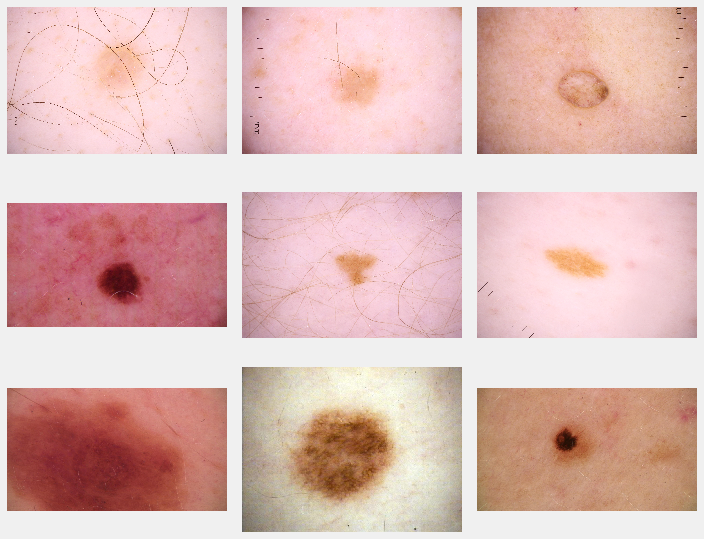

In [34]:
images = train_df['image_name'].values

# Extract 9 random images from it
random_images = [np.random.choice(images+'.jpg') for i in range(9)]

# Location of the image dir
img_dir = DataPath+'/train'

print('Display Random Images')

# Adjust the size of your images
plt.figure(figsize=(10,8))

# Iterate and plot random images
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(img_dir, random_images[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
# Adjust subplot parameters to give specified padding
plt.tight_layout()  

In [35]:
benign = train_df[train_df['benign_malignant']=='benign']
malignant = train_df[train_df['benign_malignant']=='malignant']

Display benign Images


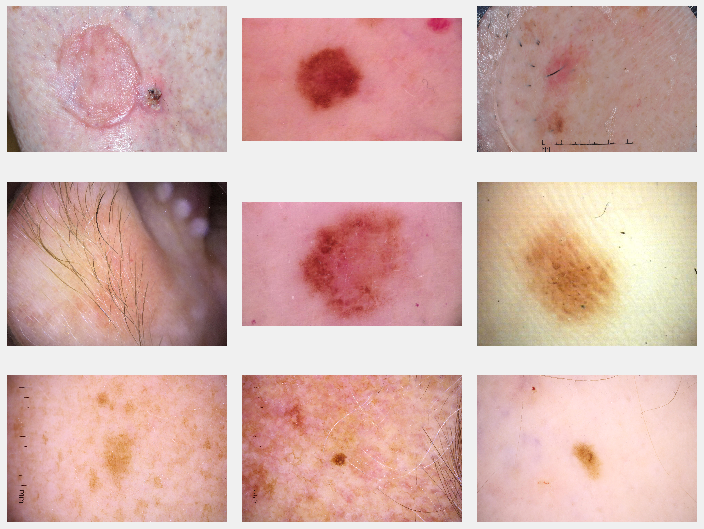

In [36]:

# Extract 9 random images from it
random_images = [np.random.choice(images+'.jpg') for i in range(9)]

# Location of the image dir
img_dir = DataPath+'/train'

print('Display benign Images')

# Adjust the size of your images
plt.figure(figsize=(10,8))

# Iterate and plot random images
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(img_dir, random_images[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
# Adjust subplot parameters to give specified padding
plt.tight_layout()   

Display malignant Images


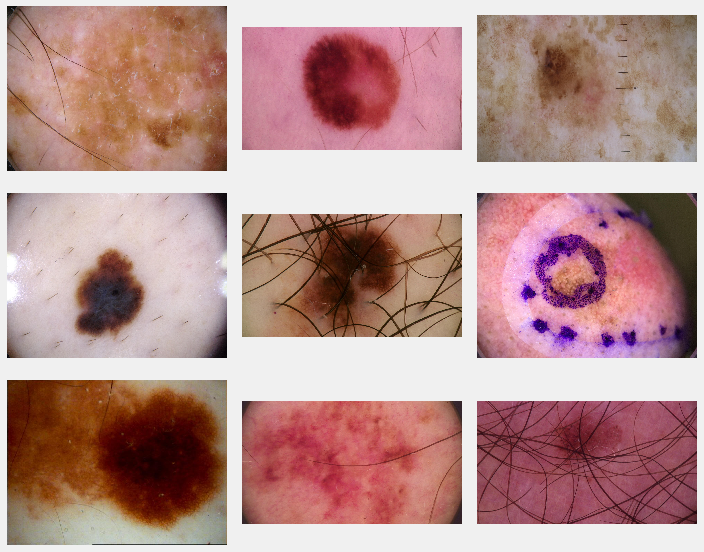

In [37]:
images = malignant['image_name'].values

# Extract 9 random images from it
random_images = [np.random.choice(images+'.jpg') for i in range(9)]

# Location of the image dir
img_dir = DataPath+'/train'

print('Display malignant Images')

# Adjust the size of your images
plt.figure(figsize=(10,8))

# Iterate and plot random images
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(img_dir, random_images[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
# Adjust subplot parameters to give specified padding
plt.tight_layout()   

Image dimensions:  (4000, 6000)
Maximum pixel value : 255.0 ; Minimum pixel value:0.0
Mean value of the pixels : 169.9 ; Standard deviation : 41.3


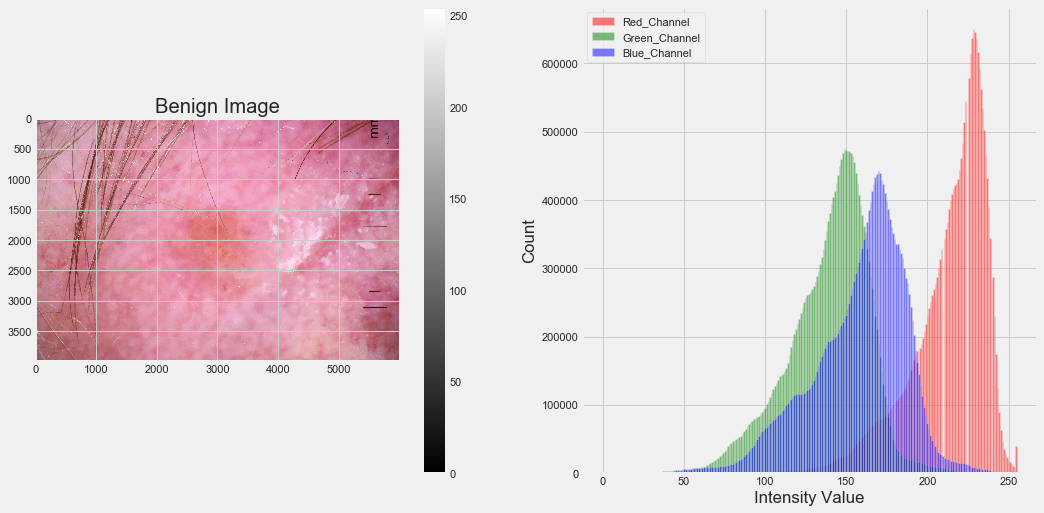

In [38]:
f = plt.figure(figsize=(16,8))
f.add_subplot(1,2, 1)

sample_img = benign['image_name'][0]+'.jpg'
raw_image = plt.imread(os.path.join(img_dir, sample_img))
plt.imshow(raw_image, cmap='gray')
plt.colorbar()
plt.title('Benign Image')
print(f"Image dimensions:  {raw_image.shape[0],raw_image.shape[1]}")
print(f"Maximum pixel value : {raw_image.max():.1f} ; Minimum pixel value:{raw_image.min():.1f}")
print(f"Mean value of the pixels : {raw_image.mean():.1f} ; Standard deviation : {raw_image.std():.1f}")

f.add_subplot(1,2, 2)

#_ = plt.hist(raw_image.ravel(),bins = 256, color = 'orange',)
_ = plt.hist(raw_image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
_ = plt.hist(raw_image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
_ = plt.hist(raw_image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.show()

Image dimensions:  (2448, 3264)
Maximum pixel value : 255.0 ; Minimum pixel value:0.0
Mean value of the pixels : 161.0 ; Standard deviation : 45.1


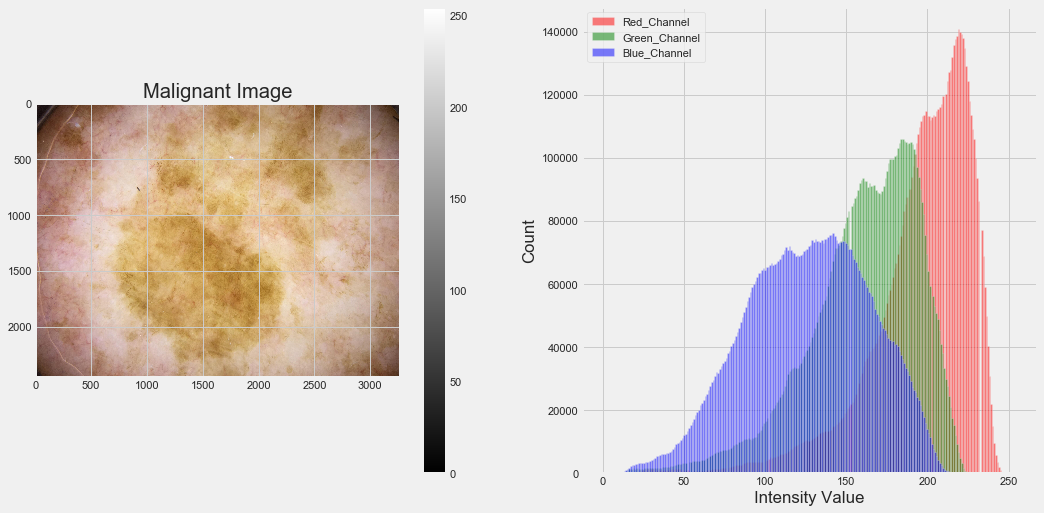

In [39]:
f = plt.figure(figsize=(16,8))
f.add_subplot(1,2, 1)

sample_img = malignant['image_name'][235]+'.jpg'
raw_image = plt.imread(os.path.join(img_dir, sample_img))
plt.imshow(raw_image, cmap='gray')
plt.colorbar()
plt.title('Malignant Image')
print(f"Image dimensions:  {raw_image.shape[0],raw_image.shape[1]}")
print(f"Maximum pixel value : {raw_image.max():.1f} ; Minimum pixel value:{raw_image.min():.1f}")
print(f"Mean value of the pixels : {raw_image.mean():.1f} ; Standard deviation : {raw_image.std():.1f}")

f.add_subplot(1,2, 2)

#_ = plt.hist(raw_image.ravel(),bins = 256, color = 'orange',)
_ = plt.hist(raw_image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
_ = plt.hist(raw_image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
_ = plt.hist(raw_image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.show()